<a href="https://colab.research.google.com/github/gabrielcgo/modulo03_BLUE/blob/main/projeto04_modulo3_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto 04** / *Módulo Extra*

Essa análise é uma atividade proposta pela Blue EdTech com o objetivo de aplicação prática dos conteúdos ensinados para obtenção parcial da nota (40%) do módulo Extra.

A atividade é composta por 3 questões práticas que serão resolvidas ao decorrer desta apresentação.


Os principais pontos que serão avaliados:
*   Levantamento de hipóteses
*   Manipulação de dados e criação de gráficos com o Pandas
*   Desenvolvimento de um sistema de recomendação

Fontes:

Dataset: https://www.kaggle.com/datasets/zynicide/wine-reviews

Sistema de recomendação: https://medium.com/@fellipefernando_34405/ram%C3%B3n-sistema-de-recomenda%C3%A7%C3%A3o-de-vinhos-1a871a4b8d86

# Calling Spacy
Para realizar a análise desse dataset iremos instalar a biblioteca SpaCy.

O SpaCy é uma biblioteca gratuita e de código aberto para processamento avançado de linguagem natural (NLP) em Python.

Se você estiver trabalhando com muito texto, eventualmente desejará saber mais sobre ele. Por exemplo, do que se trata? O que as palavras significam no contexto? Quem está fazendo o que para quem? Quais empresas e produtos são mencionados? Quais textos são semelhantes entre si?

O spaCy foi projetado especificamente para uso em produção e ajuda você a criar aplicativos que processam e “entendem” grandes volumes de texto. Ele pode ser usado para extrair informações ou criar sistemas de compreensão de linguagem natural, ou ainda pré-processar um texto para Deep Learning.

In [1]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!python -m spacy download en_core_web_sm

2022-07-19 21:55:54.652446: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.2 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Import modules

*   Para carregar o Dataset, ultilizamos o Pandas
*   O Numpy para trabalhar com arrays
*   O Seaborn para visualizar gráficos
*   SpaCy (já citado) para trabalhar com processamento de linguagem
*   Sklearn para estatística e Machine Learning
*   Collections para realizar contagem de Tokens

In [27]:
import re

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


# 1. Análise exploratória: realize as análises deste conjunto de dados, crie gráficos e anote as suas idéias.

In [4]:
# Carregando o dataset

df  = pd.read_csv('/content/winemag-data-130k-v2.csv')

In [5]:
# Vamos obter algumas informações sobre como estão as entradas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


In [6]:
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [7]:
df.isnull().sum()

Unnamed: 0                   0
country                     63
description                  0
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

Temos muitos valores faltantes, mas é notável que algumas variáveis não são importantes e podem ser removidas, como o nome e o Twitter do avaliador. Além disso, a especificidade da região 2 tem muitos valores faltantes, o que não justifica manter essa variável.

In [8]:
# Removendo as colunas não necessárias.

df = df.drop(['region_2', 'taster_name', 'taster_twitter_handle'], axis=1)

In [9]:
# Removendo as entradas com falores faltantes

df = df.dropna()

In [10]:
df.isnull().sum()

Unnamed: 0     0
country        0
description    0
designation    0
points         0
price          0
province       0
region_1       0
title          0
variety        0
winery         0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70175 entries, 3 to 129970
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   70175 non-null  int64  
 1   country      70175 non-null  object 
 2   description  70175 non-null  object 
 3   designation  70175 non-null  object 
 4   points       70175 non-null  int64  
 5   price        70175 non-null  float64
 6   province     70175 non-null  object 
 7   region_1     70175 non-null  object 
 8   title        70175 non-null  object 
 9   variety      70175 non-null  object 
 10  winery       70175 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 6.4+ MB


Agora o dataset está completo, sem valores faltantes e colunas que não agregarão na análise. 

Ao total sobraram 70.175 linhas das 130.000 originais.

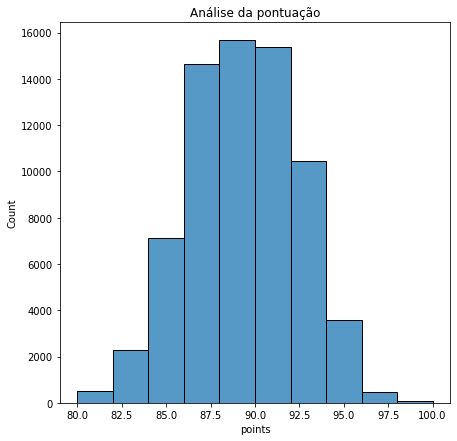

In [12]:
# Vamos visualizar a pontuação dada nos vinhos.

plt.figure(figsize=(7,7)) # Aumentei Visualização
plt.title('Análise da pontuação') # Título
sns.histplot(data=df, x ='points', bins=10)

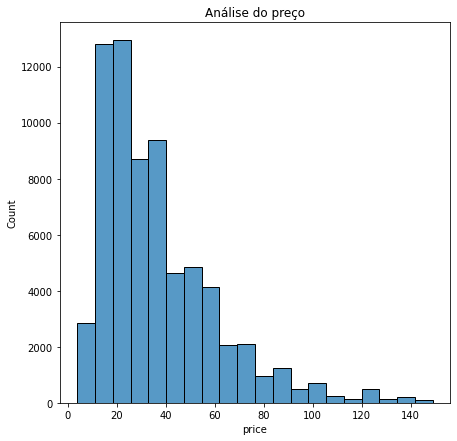

In [13]:
df2 = df.loc[(df['price'] < 150)]
plt.figure(figsize=(7,7)) # Aumentei Visualização
plt.title('Análise do preço') # Título
sns.histplot(data=df2, x ='price', bins=20)

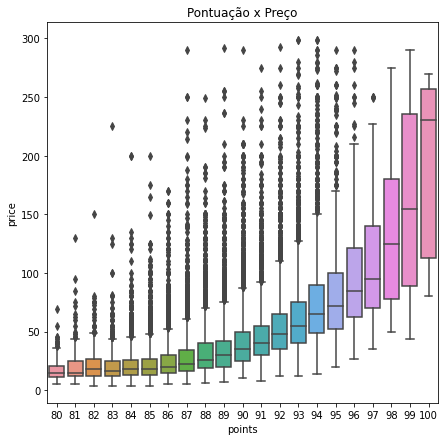

In [14]:
# Vamos analisar os preços, mas removendo alguns outliers que influenciam na visualização

df2 = df.loc[(df['price'] < 300)]
plt.figure(figsize=(7,7)) # Aumentei Visualização
plt.title('Pontuação x Preço') # Título
sns.boxplot(data=df2, x ='points', y ='price')

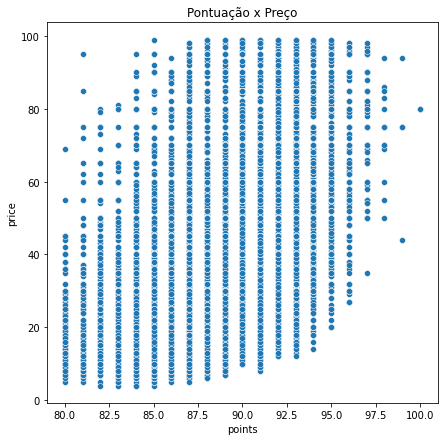

In [15]:
df2 = df.loc[(df['price'] < 100)]
plt.figure(figsize=(7,7)) # Aumentei Visualização
plt.title('Pontuação x Preço') # Título
sns.scatterplot(data=df2, x ='points', y ='price')

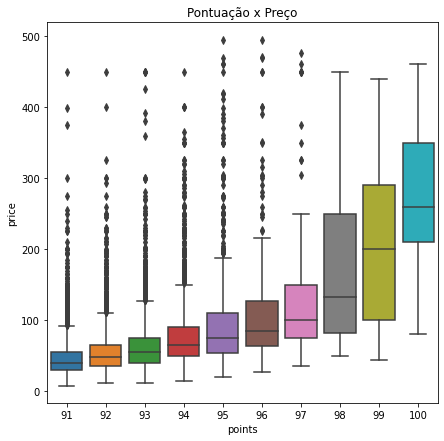

In [16]:
df2 = df.loc[(df['points'] > 90) & (df['price'] < 500)]
plt.figure(figsize=(7,7)) # Aumentei Visualização
plt.title('Pontuação x Preço') # Título
sns.boxplot(data=df2, x ='points', y ='price')

In [17]:
df.loc[df['points']==100]

,Unnamed: 0,country,description,designation,points,price,province,region_1,title,variety,winery
345,345,Australia,This wine contains some material over 100 year...,Rare,100,350.0,Victoria,Rutherglen,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
7335,7335,Italy,Thick as molasses and dark as caramelized brow...,Occhio di Pernice,100,210.0,Tuscany,Vin Santo di Montepulciano,Avignonesi 1995 Occhio di Pernice (Vin Santo ...,Prugnolo Gentile,Avignonesi
36528,36528,France,This is a fabulous wine from the greatest Cham...,Brut,100,259.0,Champagne,Champagne,Krug 2002 Brut (Champagne),Champagne Blend,Krug
39286,39286,Italy,"A perfect wine from a classic vintage, the 200...",Masseto,100,460.0,Tuscany,Toscana,Tenuta dell'Ornellaia 2007 Masseto Merlot (Tos...,Merlot,Tenuta dell'Ornellaia
45781,45781,Italy,"This gorgeous, fragrant wine opens with classi...",Riserva,100,550.0,Tuscany,Brunello di Montalcino,Biondi Santi 2010 Riserva (Brunello di Montal...,Sangiovese,Biondi Santi
89728,89728,France,This latest incarnation of the famous brand is...,Cristal Vintage Brut,100,250.0,Champagne,Champagne,Louis Roederer 2008 Cristal Vintage Brut (Cha...,Champagne Blend,Louis Roederer
89729,89729,France,This new release from a great vintage for Char...,Le Mesnil Blanc de Blancs Brut,100,617.0,Champagne,Champagne,Salon 2006 Le Mesnil Blanc de Blancs Brut Char...,Chardonnay,Salon
111754,111754,Italy,It takes only a few moments before you appreci...,Cerretalto,100,270.0,Tuscany,Brunello di Montalcino,Casanova di Neri 2007 Cerretalto (Brunello di...,Sangiovese Grosso,Casanova di Neri
113929,113929,US,In 2005 Charles Smith introduced three high-en...,Royal City,100,80.0,Washington,Columbia Valley (WA),Charles Smith 2006 Royal City Syrah (Columbia ...,Syrah,Charles Smith
118058,118058,US,This wine dazzles with perfection. Sourced fro...,La Muse,100,450.0,California,Sonoma County,Verité 2007 La Muse Red (Sonoma County),Bordeaux-style Red Blend,Verité


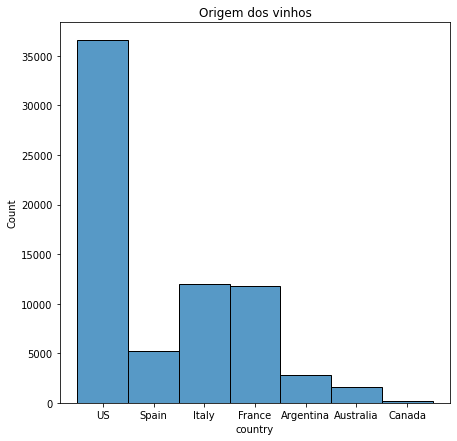

In [18]:
plt.figure(figsize=(7,7)) # Aumentei Visualização
plt.title('Origem dos vinhos') # Título
sns.histplot(data=df, x ='country')

As primeiras observações que podemos fazer são:
*   Existe uma tendência de vinhos mais baratos terem menores notas, mas não necessariamente vinhos caros terão notas maiores.
*   Os dados por país estão muito desbalanceados, sendo a análise por esse caminho inadequada.

#2. Sistema de recomendação: faça a construção de seu sistema de recomendação

OBS: O sistema de recomendação à seguir se baseia no modelo de recomendação de vinhos idealizado por Carlos Chigres, Calebe Garcia, Ismael Santos, Marina Mosleh e Sarah Santos.

In [19]:
df_reduce = df[0:2000]

In [20]:
stopwords = set(stopwords.words('english'))

In [21]:
df3 = df_reduce[['title']]

In [22]:
tf = TfidfVectorizer(analyzer='word', min_df=0, stop_words=stopwords)

In [23]:
tfidf_matrix = tf.fit_transform(df3['title'])

In [24]:
tfidf_matrix.shape

(2000, 3975)

In [25]:
medida = cosine_similarity(tfidf_matrix,tfidf_matrix)

In [30]:
results = []
scores = []

for idx, row in df3.iterrows ():
  result_parcial = cosine_similarity(medida[idx], idx)

  for ind, scr in result_parcial:
    if ind not in results:
      results.append(ind)
      scores.append(scr)

ValueError: ignored

In [31]:
df_recom = pd.DataFrame()

for ind in results:
  select = (df3.index == ind)
  df_temp = df3[select]

  df_recom = pd.concat([df_recom, df_temp], axis=0)

In [32]:
df_recom.score = scores

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


# 3. Relatório: construa um relatório utilizando o Markdown para escrever. Seja criativo para apresentar seus achados e siga os passos abaixo:
*   Imagine que você possui uma startup e este é o primeiro relatório apresentará
*   Coloque o nome do seu produto
*   Apresente a introdução do problema (seja sucinto, escreva com poucas palavras)
*   Coloque gráficos e frases para sustentar seus argumentos
*   Mostre as soluções do mercado
*   Escreva sobre a sua solução e por que ela é a melhor